**Step 1: Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Step 2: Defining a python function to plot the ROC curves.**

In [2]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**Step 3: Generate sample data.**

In [3]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

**Step 4: Split the data into train and test sub-datasets.**

In [4]:
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

**Step 5: Fit a model on the train data.**

In [5]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier()

**Step 6: Predict probabilities for the test data.**

In [6]:
probs = model.predict_proba(testX)

**Step 7: Keep Probabilities of the positive class only.**

In [7]:
probs = probs[:, 1]

**Step 8: Compute the AUC Score.**

In [8]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.96


**Step 9: Get the ROC Curve.**

In [9]:
fpr, tpr, thresholds = roc_curve(testy, probs)

**Step 10: Plot ROC Curve using our defined function**

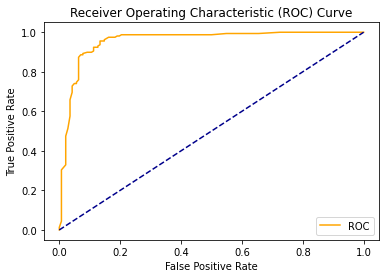

In [10]:
plot_roc_curve(fpr, tpr)